# KNN

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier, DummyRegressor

## k-NN - K-Nearest Neighbors for classification

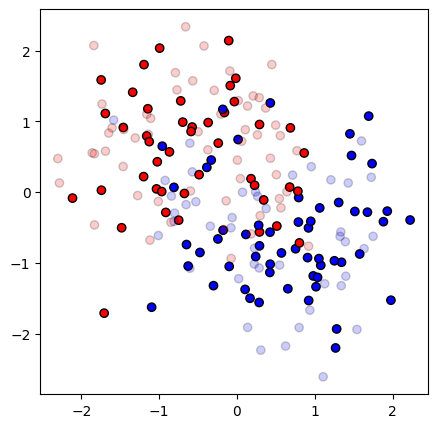

In [3]:
''' define the dataset '''
from sklearn.datasets import make_moons

# Define dataset
X, y = make_moons(n_samples=200, noise=0.4, random_state=0)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=42)

# Plot the training and testing points
plt.figure(figsize=(5, 5))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
plt.scatter(X_train[:, 0], X_train[:, 1],
            c=y_train, cmap=cm_bright, edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=y_test, cmap=cm_bright, edgecolors='k',
            alpha=0.2)
plt.show()

In [4]:
''' Build and use classifier '''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=7, p=2)
# p: power parameter for the Minkowski metric.
# p = 1 --> manhattan_distance (l1)
# p = 2 --> euclidean_distance (l2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# With 2 classes of the same size, accuracy can be used
accuracy_score(y_test, y_pred)

0.8

<div class="alert alert-block alert-danger">
Plot the decision regions with different neighbors and distance and analyse the impact
</div>

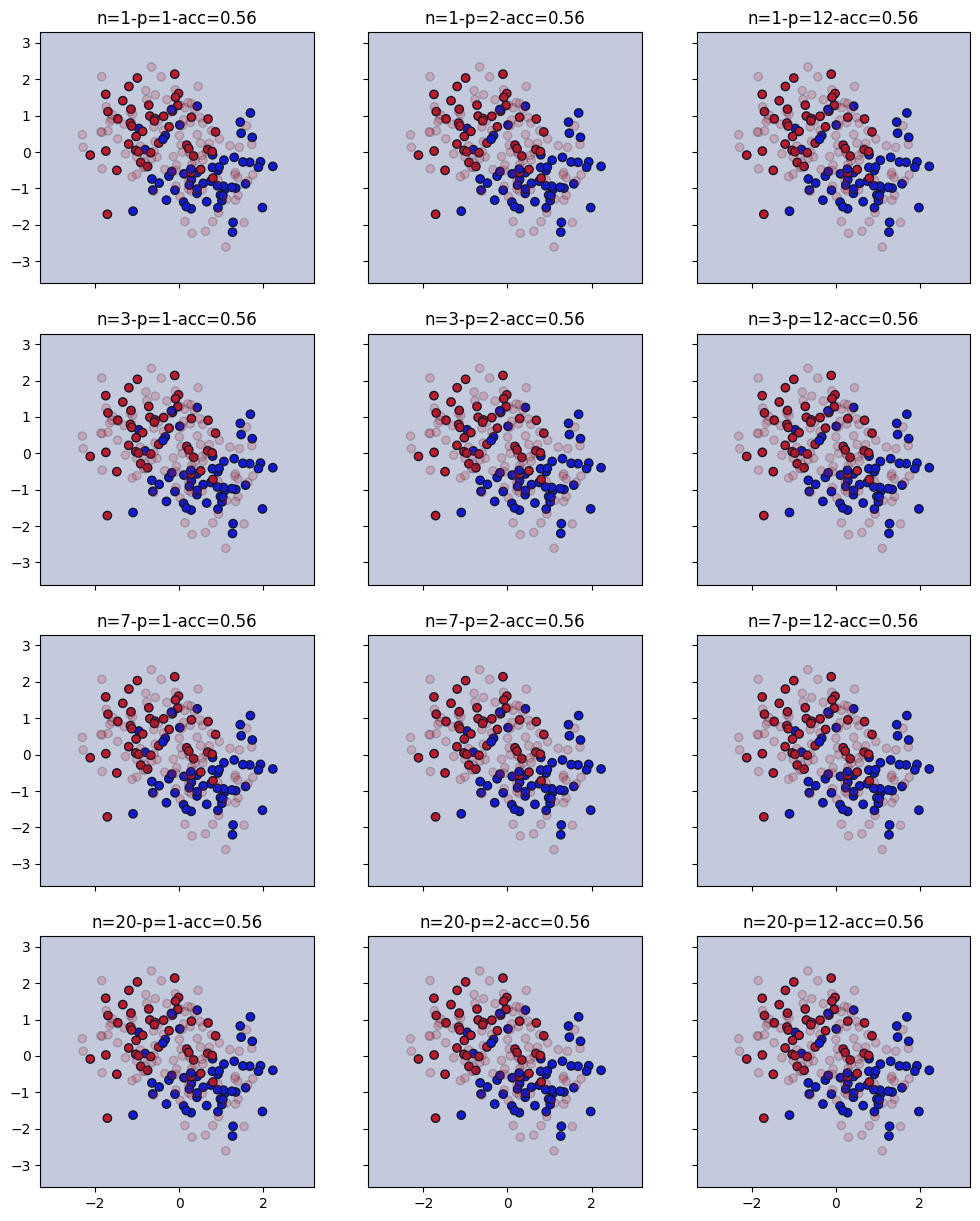

In [5]:
''' Plot the decision regions with different neighbors and distance '''
# change the number of neighbors
n_neighbors = [1, 3, 7, 20]
n_power = [1, 2, 12]

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(len(n_neighbors), len(n_power), sharex='col', sharey='row', figsize=((len(n_power)+1)*3, (len(n_neighbors)+1)*3))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

for i, neighbors in enumerate(n_neighbors):
    for j, power in enumerate(n_power):
        # Create a classifier with neighbors and power as a distance
        """ replace the following DummyClassifier by
        a k-NN classifier with k=neighbors and p=power
        """
        clf = DummyClassifier() 
        # Fit the model on train
        clf.fit(X_train, y_train) # Is it correct ?
        # Predict on test, y_pred contain the prediction
        y_pred = [0]*len(y_test) # Modify it

        ax[i, j].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        ax[i, j].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=cm_bright, edgecolors='k', alpha=0.2)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax[i, j].contourf(xx, yy, Z, alpha=0.3)
        ax[i, j].set_title("n="+str(neighbors)+"-p="+str(power)+"-acc="+str(accuracy_score(y_test, y_pred)))
plt.show()

<div class="alert alert-block alert-danger">
What is the most important ?
- neighbors
- power
</div>

<div class="alert alert-block alert-danger">
Plot the decision regions with different neighbors and distance and analyse the impact
</div>

''' Plot the decision regions with different neighbors and weighted strategy '''
# change the number of neighbors
n_neighbors = [1, 3, 7, 20]
power = 2
n_weights = ['uniform', 'distance']

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

fig, ax = plt.subplots(len(n_neighbors), len(n_weights), sharex='col', sharey='row', figsize=((len(n_weights)+1)*3, (len(n_neighbors)+1)*3))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

for i, neighbors in enumerate(n_neighbors):
    for j, weights in enumerate(n_weights):
        """ replace the following DummyClassifier by
        a k-NN classifier with k=neighbors and weights=power
        """clf = DummyClassifier() # Modify it
        # Fit the model on train
        clf.fit(X_train, y_train) # Is it correct ?
        # Predict on test, y_pred contain the prediction
        y_pred = [0]*len(y_test) # Modify it

        ax[i, j].scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        ax[i, j].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=cm_bright, edgecolors='k', alpha=0.2)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax[i, j].contourf(xx, yy, Z, alpha=0.3)
        ax[i, j].set_title("n="+str(neighbors)+"-w="+str(weights)+"-acc="+str(accuracy_score(y_test, y_pred)))
plt.show()

<div class="alert alert-block alert-danger">
What is the most important ?
- neighbors
- weight
</div>

## k-NN - K-Nearest Neighbors for regression

Do the same for regression

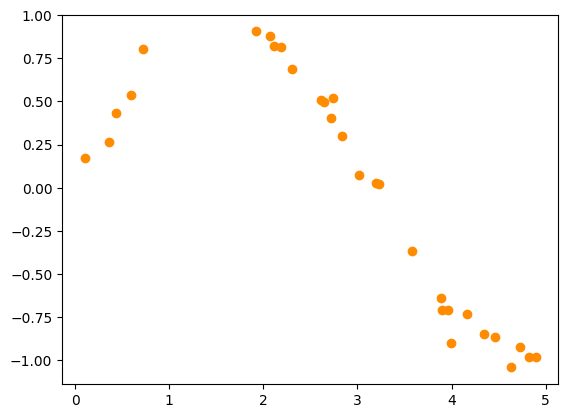

In [6]:
from sklearn.datasets import make_regression

# Define dataset
nb_items = 30
np.random.seed(0)
X_train = np.sort(5 * np.random.rand(nb_items, 1), axis=0)
y_train = np.sin(X_train).ravel() + 0.3*(0.5 - np.random.rand(nb_items))*(np.random.rand(nb_items)<0.7)

X_test = np.linspace(0, 5, 500)[:, np.newaxis]

# Plot the training and testing points
plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.show()

In [7]:
# Create a set of point in order to visualize the prediction
X_test = np.linspace(0, 5, 500)[:, np.newaxis]

<div class="alert alert-block alert-danger">
Plot the training points and the prediction curve. Try different neighbors value or weighted strategy and observe the result.
</div>

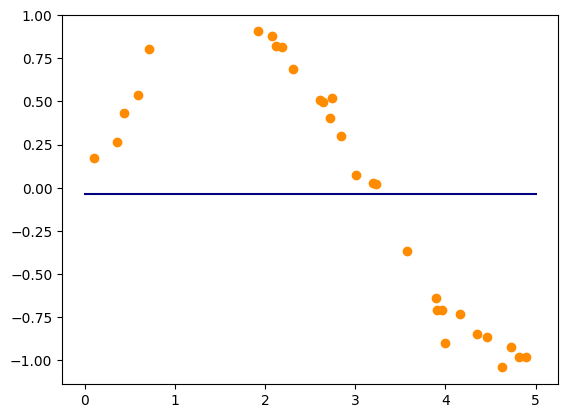

In [8]:
from sklearn.neighbors import KNeighborsRegressor

weights='uniform'
n_neighbors = 2
knn = DummyRegressor()
y_ = knn.fit(X_train, y_train).predict(X_test)
y_pred = knn.predict(X_test)

plt.scatter(X_train, y_train, color='darkorange', label='data')
plt.plot(X_test, y_pred, color='navy', label='prediction')
plt.show()

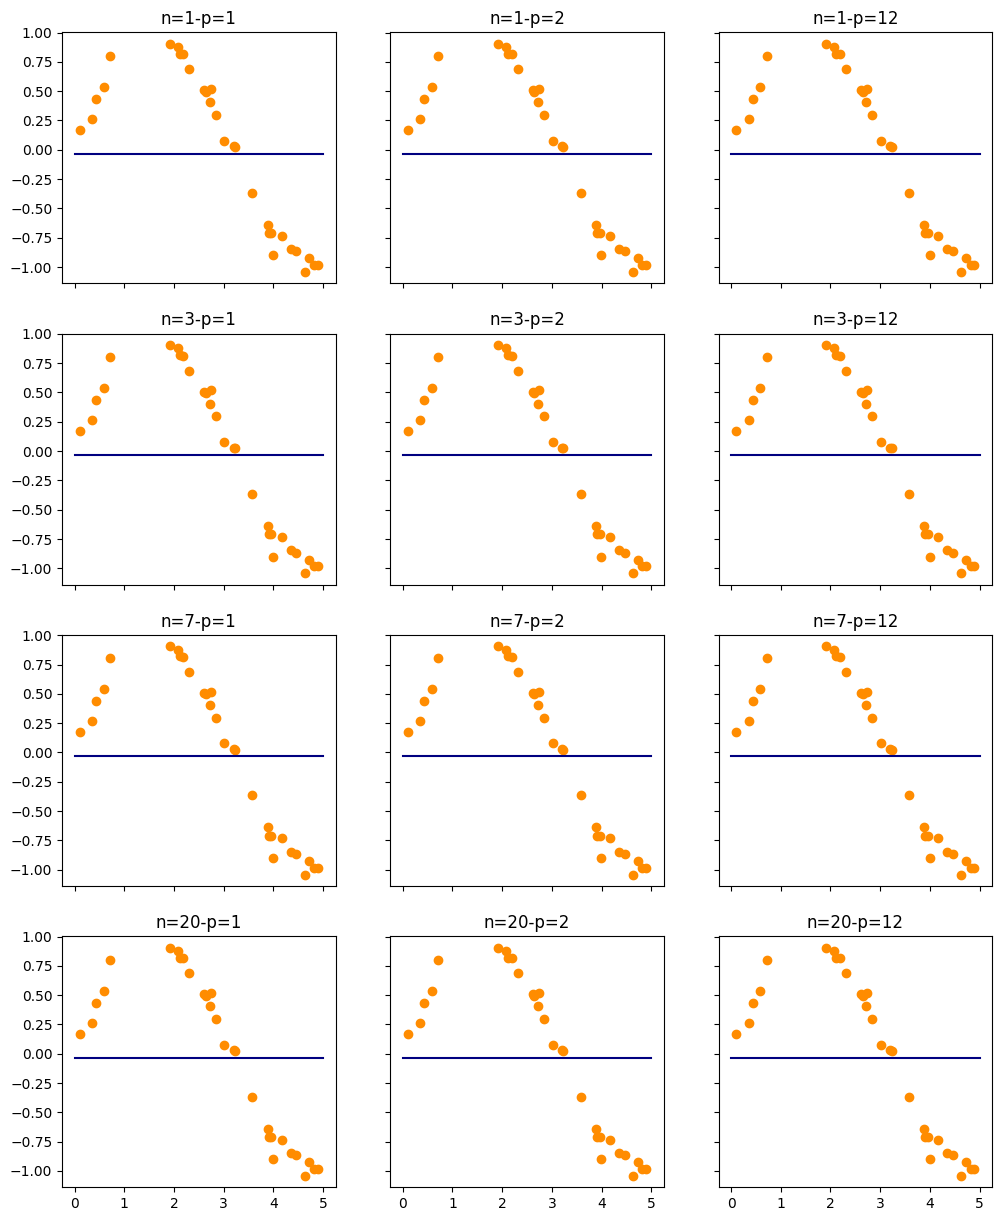

In [9]:
n_neighbors = [1, 3, 7, 20]
n_power = [1, 2, 12]

fig, ax = plt.subplots(len(n_neighbors), len(n_power), sharex='col', sharey='row', figsize=((len(n_power)+1)*3, (len(n_neighbors)+1)*3))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

for i, neighbors in enumerate(n_neighbors):
    for j, power in enumerate(n_power):
        clf = DummyRegressor() # Correct it if necessary
        clf.fit(X_train, y_train) # Correct it if necessary
        y_pred = clf.predict(X_test) # Correct it if necessary
        ax[i, j].scatter(X_train, y_train, color='darkorange', label='data')
        ax[i, j].plot(X_test, y_pred, color='navy', label='prediction')
        ax[i, j].set_title("n="+str(neighbors)+"-p="+str(power))
plt.show()

## The lab for today: Build a KNN model

In this lab we can use:
- knn imputer for missing value imputation
- knn as classifier

The [horse colic dataset](https://archive.ics.uci.edu/ml/datasets/Horse+Colic) describes medical characteristics of horses with colic and whether they lived or died.

The data is supplied in two files. The first contains 300 horse
colic cases that should be used for training data while the second contains
68 cases that can be used for testing the performance of your method.

The variable that we have tended to try and predict is:
* V23: what eventually happened to the horse? (1 = lived, 2 = died, 3 = was euthanized)
* V24, surgical lesion? retrospectively, was the problem (lesion) surgical? All cases are either operated upon or autopsied so that this value and the lesion type are always known (1 = Yes, 2 = No)
* V25, V26, V27: type of lesion coded on 4 digits
* V28:  is pathology data present for this case? (1 = Yes, 2 = No)

The sample contains approx. 30% missing values (indicated by a zero in the
data provided). You will need to deal with all types of variables (continuous,
discrete, and nominal) as well as the missing values in your method.

The dataset has many missing values for many of the columns where each missing value is marked with a question mark character (“?”).

In [10]:
# load dataset
url = "https://www.i3s.unice.fr/~riveill/dataset/"

def read_dataset(url, name):
    dataframe = pd.read_csv(url+name, header=None, sep=";",
                        na_values='?', on_bad_lines='skip')
    mapper = {}
    for old, new in zip(dataframe.columns, ["V"+str(i+1) for i in dataframe.columns]):
        mapper[old] = new
    dataframe = dataframe.rename(mapper, axis=1)

    dataframe['V1'] = (dataframe['V1']==1.0) # Surgery ?
    dataframe['V2'] = (dataframe['V2']==1) # Adult ?
    dataframe['V3'] = dataframe['V3'].astype('category') # Hospital number
    # dataframe['V4'], rectal temperature
    # dataframe['V5'], heart pulse
    # dataframe['V6'], respirtory rate
    dataframe['V7'] = dataframe['V7'].astype('category') # temperature of extremities
    dataframe['V8'] = dataframe['V8'].astype('category') # peripheral pulse
    dataframe['V9'] = dataframe['V9'].astype('category') # mucous membranes
    dataframe['V10'] = dataframe['V10'].astype('category') # capillary refill time
    dataframe['V11'] = dataframe['V11'].astype('category') # pain
    dataframe['V12'] = dataframe['V12'].astype('category') # peristalsis
    dataframe['V13'] = dataframe['V13'].astype('category') # abdominal distension
    dataframe['V14'] = dataframe['V14'].astype('category') # nasogastric tube
    dataframe['V15'] = dataframe['V15'].astype('category') # nasogastric reflux
    # dataframe['V16'], nasogastric reflux PH
    dataframe['V17'] = dataframe['V17'].astype('category') # rectal examination - feces
    dataframe['V18'] = dataframe['V18'].astype('category') # abdomen
    # dataframe['V19'], packed cell volume
    # dataframe['V20'], total protein
    dataframe['V21'] = dataframe['V21'].astype('category') # abdominocentesis appearance
    # dataframe['V22'], abdomcentesis total protein

    dataframe['V23'] = dataframe['V23'].astype('category')
    dataframe['V24'] = (dataframe['V24']==1.0)
    dataframe[['V25', 'V26', 'V27']] = dataframe[['V25', 'V26', 'V27']].astype('category')
    dataframe['V28'] = (dataframe['V28']==1.0)
    
    return dataframe

train = read_dataset(url, "horse-colic-train.csv")
test = read_dataset(url, "horse-colic-test.csv")

train.head()

V1     V2       V3    V4     V5    V6   V7   V8   V9  V10  ...   V19  \
0  False   True   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   
1   True   True   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0   
2  False   True   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   
3   True  False  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   
4  False   True   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   

    V20  V21  V22  V23    V24    V25 V26  V27    V28  
0   8.4  NaN  NaN  2.0  False  11300   0    0  False  
1  85.0  2.0  2.0  3.0  False   2208   0    0  False  
2   6.7  NaN  NaN  1.0  False      0   0    0   True  
3   7.2  3.0  5.3  2.0   True   2208   0    0   True  
4   7.4  NaN  NaN  2.0  False   4300   0    0  False  

[5 rows x 28 columns]

In [11]:
train.dtypes

V1         bool
V2         bool
V3     category
V4      float64
V5      float64
V6      float64
V7     category
V8     category
V9     category
V10    category
V11    category
V12    category
V13    category
V14    category
V15    category
V16     float64
V17    category
V18    category
V19     float64
V20     float64
V21    category
V22     float64
V23    category
V24        bool
V25    category
V26    category
V27    category
V28        bool
dtype: object

In [12]:
""" Dataset preparation """
target = ['V23']
remove = ['V24', 'V25', 'V26', 'V27', 'V28']
features = [c for c in test.columns if c not in target + remove]
types = [train[t].dtype for t in features]

# Drop row if target value is missing
train = train.dropna(axis=0, subset=target)
X_train = train[features]
y_train = train[target]

test = test.dropna(axis=0, subset=target)
X_test = test[features]
y_test = test[target]

In [13]:
X_train.head()

V1     V2       V3    V4     V5    V6   V7   V8   V9  V10  ...  V13  \
0  False   True   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  4.0   
1   True   True   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  2.0   
2  False   True   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  1.0   
3   True  False  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  4.0   
4  False   True   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  NaN   

   V14  V15  V16  V17  V18   V19   V20  V21  V22  
0  NaN  NaN  NaN  3.0  5.0  45.0   8.4  NaN  NaN  
1  NaN  NaN  NaN  4.0  2.0  50.0  85.0  2.0  2.0  
2  NaN  NaN  NaN  1.0  1.0  33.0   6.7  NaN  NaN  
3  1.0  2.0  5.0  3.0  NaN  48.0   7.2  3.0  5.3  
4  NaN  NaN  NaN  NaN  NaN  74.0   7.4  NaN  NaN  

[5 rows x 22 columns]

In [14]:
# Print the different classes
np.unique(y_train)

array([1., 2., 3.])

<div class="alert alert-block alert-danger">
Is the dataset balanced ?
</div>

In [15]:
""" Put your code here """

' Put your code here '

<div class="alert alert-block alert-danger">
Summarize the number of rows with missing values for each column
</div>

In [16]:
""" Put your code here """

' Put your code here '

### Build an sklearn pipeline in order to fill missing value, normalize data and predict

<div class="alert alert-block alert-danger">
Build a pipeline that:
    
- imputes the missing values with a kNN imputer (be carrefull, the strategy can be different depending on whether it is numerical or categorical data)

- normalizes / encodes the data (also the work to be done is different and may depend on the next step)

- predicts with a kNN based model (find the right hyper-parameters).
</div>

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [18]:
""" Build the pipeline here """

' Build the pipeline here '

In [19]:
""" Fit the pipeline here """

' Fit the pipeline here '

In [20]:
""" Predict with the pipeline here """

' Predict with the pipeline here '

In [21]:
""" Evaluate your pipeline here : classification report and confusion matrix """

' Evaluate your pipeline here : classification report and confusion matrix '

### Find best-hyper parameters: focus your search on the number of neighbors

In [22]:
""" Use GridSearch to find the best hyperparameter """

' Use GridSearch to find the best hyperparameter '

In [23]:
""" Print your best hyper-parameters """

' Print your best hyper-parameters '

In [24]:
""" Print here the classification report for your best hyper-parameters """

' Print here the classification report for your best hyper-parameters '